# Automatic classification of consumer products

## Context

- Marketplace is a company that wants to launch an e-commerce platform where sellers offer items to buyers by posting a photo and a description.
- At present, customers manually post their items under the different catergories, making it an unreliable process.
- Considering an increase in the buyers and sellers patronages, the company wants to make the platform user friendly by automating the process of uploading of items by the sellers and search for products by the buyers 

## Goal:
 - Study the feasibility of an engine to classify items into different categories with a sufficient level of accuracy.

## Objectives:
My mission is to: 
- carry out a feasibility study of an article classification engine, based on an image and a description, for the automation of the attribution of the article category.
- to analyze the dataset by performing a preprocessing of the product descriptions and images, a dimension reduction and then a clustering using deep learning, unsupervised machine learning, and computer vision models.
- produce two-dimensional graphs, and confirmed by a similarity calculation between the real categories and the clusters, illustrating the fact that the extracted features allow clustering of products of the same category.

## 1.0 Import libraries

In [76]:
import pandas as pd # data processing
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns

#Nltk
import re

import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize  
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import WordPunctTokenizer
from wordcloud import WordCloud
from collections import Counter
import string
from string import punctuation
import gensim
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

#Tensorflow
import tensorflow as tf
import tensorflow.keras
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
import tensorflow_hub as hub

#Keras
from keras.models import Model, Sequential
from keras.layers import Embedding, Input
from keras.preprocessing.text import text_to_word_sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.utils import plot_model
from tensorflow.keras.applications.xception import preprocess_input

#Sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import adjusted_rand_score, rand_score
from sklearn import cluster, metrics

#Transformers and Bert
import transformers
from transformers import AutoModel, BertTokenizerFast, TFAutoModel, AutoTokenizer
from sentence_transformers import SentenceTransformer

# Pytorch
import torch
import torch.nn as nn

import time
import math
import cv2
from matplotlib.image import imread
import os
from os import listdir

# allow plot to appear within the notebook
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

## 2.0 Load and read dataset

In [2]:
Data = pd.read_csv('flipkart_com-ecommerce_sample_1050.csv')
Data.head(5)

uniq_id            crawl_timestamp  \
0  55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1  7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2  64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
3  d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
4  6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   

                                         product_url  \
0  http://www.flipkart.com/elegance-polyester-mul...   
1  http://www.flipkart.com/sathiyas-cotton-bath-t...   
2  http://www.flipkart.com/eurospa-cotton-terry-f...   
3  http://www.flipkart.com/santosh-royal-fashion-...   
4  http://www.flipkart.com/jaipur-print-cotton-fl...   

                                        product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   
1                         Sathiyas Cotton Bath Towel   
2                Eurospa Cotton Terry Face Towel Set   
3  SANTOSH ROYAL FASHION Cotton Printed King size...   
4  Jaipur Print Cotton Floral King sized Double B...   

                               product_category_tree               pid  \
0  ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z   
1  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEGFZHGBXPHZUH   
2  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEG6SHXTDB2A2Y   
3  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJT9UQWHDUBH4   
4  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJTHNGWVGWWQU   

   retail_price  discounted_price                                 image  \
0        1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1         600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2           NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3        2699.0            1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg   
4        2599.0             698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg   

   is_FK_Advantage_product                                        description  \
0                    False  Key Features of Elegance Polyester Multicolor ...   
1                    False  Specifications of Sathiyas Cotton Bath Towel (...   
2                    False  Key Features of Eurospa Cotton Terry Face Towe...   
3                    False  Key Features of SANTOSH ROYAL FASHION Cotton P...   
4                    False  Key Features of Jaipur Print Cotton Floral Kin...   

        product_rating       overall_rating                  brand  \
0  No rating available  No rating available               Elegance   
1  No rating available  No rating available               Sathiyas   
2  No rating available  No rating available                Eurospa   
3  No rating available  No rating available  SANTOSH ROYAL FASHION   
4  No rating available  No rating available           Jaipur Print   

                              product_specifications  
0  {"product_specification"=>[{"key"=>"Brand", "v...  
1  {"product_specification"=>[{"key"=>"Machine Wa...  
2  {"product_specification"=>[{"key"=>"Material",...  
3  {"product_specification"=>[{"key"=>"Brand", "v...  
4  {"product_specification"=>[{"key"=>"Machine Wa...

#### 2.1 Pre-exploratory analysis

In [3]:
# General overview of the dataset
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1050 non-null   object 
 1   crawl_timestamp          1050 non-null   object 
 2   product_url              1050 non-null   object 
 3   product_name             1050 non-null   object 
 4   product_category_tree    1050 non-null   object 
 5   pid                      1050 non-null   object 
 6   retail_price             1049 non-null   float64
 7   discounted_price         1049 non-null   float64
 8   image                    1050 non-null   object 
 9   is_FK_Advantage_product  1050 non-null   bool   
 10  description              1050 non-null   object 
 11  product_rating           1050 non-null   object 
 12  overall_rating           1050 non-null   object 
 13  brand                    712 non-null    object 
 14  product_specifications  

In [4]:
# check the dimension of the dataset
Data.shape

(1050, 15)

In [5]:
# check for missing values in the dataset
Data.isnull().sum()

uniq_id                      0
crawl_timestamp              0
product_url                  0
product_name                 0
product_category_tree        0
pid                          0
retail_price                 1
discounted_price             1
image                        0
is_FK_Advantage_product      0
description                  0
product_rating               0
overall_rating               0
brand                      338
product_specifications       1
dtype: int64

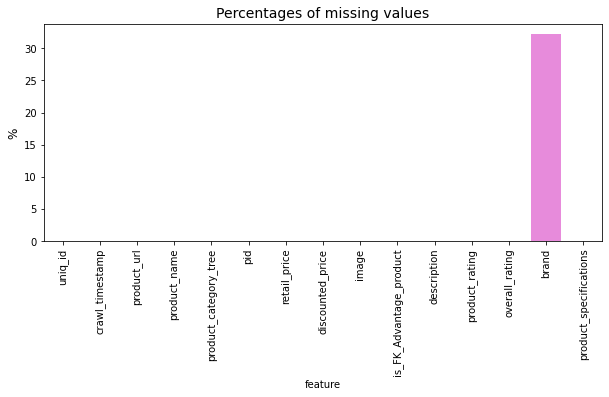

In [6]:
# Display the percentage of the missing values in the dataset

df_na = Data.isna().sum()/len(Data)*100

# visualize
fig = plt.figure(1, figsize=(10, 4))
sns.barplot(x=df_na.index, y=df_na.values)
plt.xticks(rotation=90)
plt.xlabel("feature")
plt.ylabel("%", size = 12)
plt.title("Percentages of missing values", size = 14)
plt.show()

In [7]:
# check for duplicated rows
print("Number of duplicate observations: ", Data.duplicated().sum())

Number of duplicate observations:  0


#### 2.2 - Data preparation, cleaning, exploratory analyses, and feature engineering

In [8]:
# Check the number of categories in the dataset
print("Number of unique product category tree: ", Data["product_category_tree"].nunique())

Number of unique product category tree:  642


In [9]:
# Extract level 1 of product category
Data['Label'] = Data["product_category_tree"].str.split(">>").apply(lambda x: x[0])

#Data['Category_2'] = Data["product_category_tree"].str.split(">>").apply(lambda x: x[1])

# Remove suffix '["' in the category level_1 column
Data['Label'] = Data['Label'].str.replace('\["', "")

# check the products in level 1 of product category
Count = Data['Label'].value_counts()

print("Product category level 1 : ")
print("-----------------")
print(Count)

Product category level 1 : 
-----------------
Home Furnishing                150
Baby Care                      150
Watches                        150
Home Decor & Festive Needs     150
Kitchen & Dining               150
Beauty and Personal Care       150
Computers                      150
Name: Label, dtype: int64


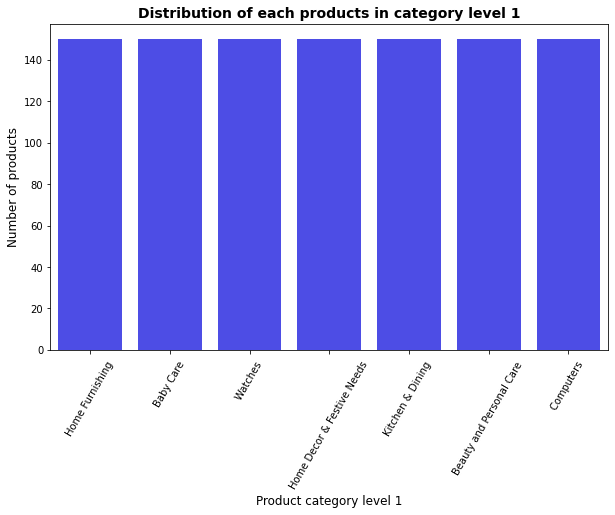

Category level 1 products have equal number of targets (labels), thus we have a balanced class dataset


In [10]:
#visualize the distribution of products in category 1
plt.figure(figsize = (10,6))
sns.countplot(data=Data, x='Label', color = 'blue', alpha = 0.8)
plt.xticks(rotation=60)
plt.ylabel("Number of products", size=12)
plt.xlabel("Product category level 1", size =12)
plt.title('Distribution of each products in category level 1', size =14, fontweight='bold')
plt.show()

print('Category level 1 products have equal number of targets (labels), thus we have a balanced class dataset')

#### 2.3 Create the corpus

In [11]:
# Concatenate product name and description to create the corpus (collection of text documents)

Data['Corpus'] = Data['product_name'] + ' ' + Data['description']

# row with maximum length of corpus
maximum_length = len(Data['Corpus'].max())

# Combine all words in description column to a large string
raw_corpus = ' '.join([text for text in Data['Corpus']])

# check total number of words in product name and description column before cleaning
print('Length of maximum combined description is: {}'.format(maximum_length))
print("Total number of words in the raw description (corpus_size): ", len(raw_corpus.split()))
print("Number of unique words in the raw description (corpus_size): ", len(set(raw_corpus.split())))

Length of maximum combined description is: 2568
Total number of words in the raw description (corpus_size):  87644
Number of unique words in the raw description (corpus_size):  9591


## 3.0 Feature Extraction - Text Dataset

### 3.1 Text pre-processing (cleaning and normalization) 
 - clean and remove unnecessary words and characters for meaningful understanding by machine algorithms
 - the cleaning and normalization process involves:
     - removal of capital letters - transform all text to small letters
     - removal of numeric values - keep only alphabetical letters
     - removal of the punctuations
     - removal of stopwords and single letters - stop words are common words in any language that occur with a high frequency but do not deliver meaningful information for the whole sentence
     - ***tokenization*** - tranform text to list of words (tokens)
     - ***lemmatization*** - process of reducing word to the root form 

In [12]:
lemmatizer = WordNetLemmatizer()
words = set(nltk.corpus.words.words())
tokenizer = WordPunctTokenizer()

# Function for preprocessing/cleaning of corpus 
def text_cleansing(document):
    # Tokenize the text - split into words
    #tokens = word_tokenize(document)
    tokens = tokenizer.tokenize(document)
    # convert all words to lowercase
    lower = [w.lower() for w in tokens]
    # Remove punctuations from each words
    #punc = [w for w in lower if w not in string.punctuation] 
    # create an empty mapping table list for all of the characters to remove
    table_map = str.maketrans('', '', string.punctuation) 
    # translate each word to remove the punctuation
    strip_punct = [w.translate(table_map) for w in lower]
    # remove non-alphabetic tokens 
    words = [w for w in strip_punct if w.isalpha()]
    # filter out stop words
    stop_words = [w for w in words if w not in set(stopwords.words('english'))]
    # keep only words >2 letters
    st_w = [w for w in stop_words if len(w) > 2] 
    # remove special characters and spaces
    special_car = (re.sub(r"[^a-zA-Z0-9]","", w) for w in st_w ) 
    # lemmatize the tokens
    lemma = (lemmatizer.lemmatize(w) for w in special_car) 
    return ' '.join(lemma)   

In [13]:
# clean each document in the corpus
Data['clean_Corpus'] = Data['Corpus'].apply(text_cleansing)
clean_corpus = Data['clean_Corpus']
clean_corpus.head(5)

0    elegance polyester multicolor abstract eyelet ...
1    sathiyas cotton bath towel specification sathi...
2    eurospa cotton terry face towel set key featur...
3    santosh royal fashion cotton printed king size...
4    jaipur print cotton floral king sized double b...
Name: clean_Corpus, dtype: object

Keep only relevant columns

In [14]:
# Select relevant features
Data_clean = Data[['image', 'clean_Corpus', 'Label']]

# use clean_corpus as variable name for the clean_Corpus series
clean_corpus = Data_clean['clean_Corpus']

# View top 5 rows of the new dataframe
Data_clean.head(5)

image  \
0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3  d4684dcdc759dd9cdf41504698d737d8.jpg   
4  6325b6870c54cd47be6ebfbffa620ec7.jpg   

                                        clean_Corpus             Label  
0  elegance polyester multicolor abstract eyelet ...  Home Furnishing   
1  sathiyas cotton bath towel specification sathi...        Baby Care   
2  eurospa cotton terry face towel set key featur...        Baby Care   
3  santosh royal fashion cotton printed king size...  Home Furnishing   
4  jaipur print cotton floral king sized double b...  Home Furnishing

### 3.2 Exploratory data analysis

#### 3.2.1 Histogram

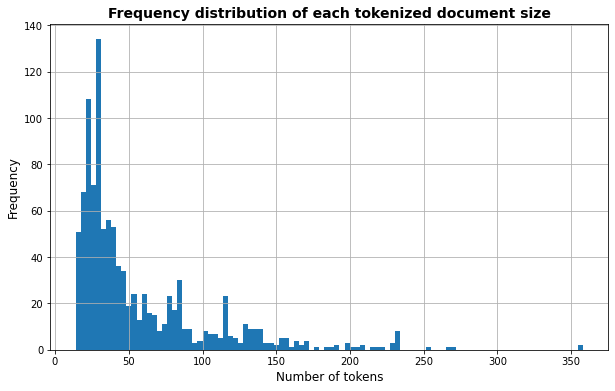

The maximum number of word tokens in description is: 14
The maximum number of word tokens in description is: 358


In [15]:
# length of each tokenized combined description rows
token_length = clean_corpus.apply(lambda text : len(text.split()))

# visualize distribution of the number of tokens in descriptions after cleaning
plt.figure(figsize=(10, 6))
token_length.hist(bins = 100)
plt.xlabel('Number of tokens', size =12)
plt.ylabel('Frequency', size =12)
plt.title('Frequency distribution of each tokenized document size', size =14, fontweight='bold')
plt.show()

len_max = token_length.max()
len_min = token_length.min()

print('The maximum number of word tokens in description is: {}'.format(len_min))
print('The maximum number of word tokens in description is: {}'.format(len_max))

#### 3.2.2 WordCloud
 - Visualize the most frequent words (tokens) in the cleaned corpus

In [16]:
# create a corpus - Combine all words in description column to a large string
Corpus_WC = ' '.join([text for text in clean_corpus])

# get the total number of words in corpus
print("Total number of words in the cleaned corpus: ", len(Corpus_WC.split()))
print("Number of unique words in the cleaned corpus: ", len(set(Corpus_WC.split())))

Total number of words in the cleaned corpus:  58989
Number of unique words in the cleaned corpus:  4380


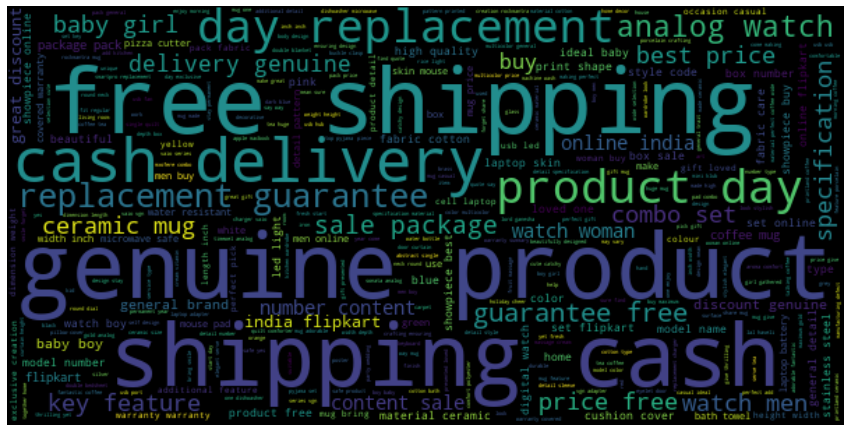

In [17]:
# Create a WordCloud object and generate a word cloud
word_cloud = WordCloud(random_state = 8, normalize_plurals = False, width = 600, height= 300,
        max_words = 300).generate(Corpus_WC)

# Visualize the word cloud
plt.figure(figsize = (15,12))

# add interpolation = bilinear to smooth things out
plt.imshow(word_cloud, interpolation='bilinear')

# and remove the axis
plt.axis("off")
plt.show()

#### 3.2.3 Distribution of most frequent words

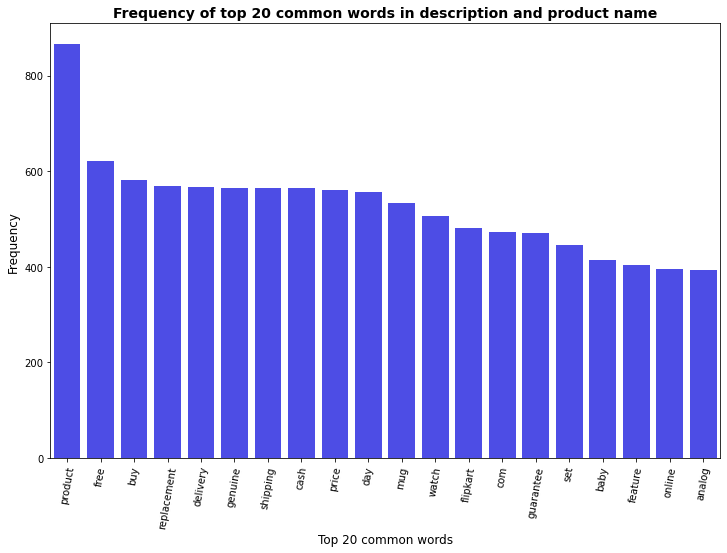

In [18]:
# Transform the text into a list of words by splitting over the space character ' '
word_list = Corpus_WC.split(' ')

# and count the words
freq_corpus = Counter(word_list)
feq_corpus_words = [word[0] for word in freq_corpus.most_common(20)]
feq_corpus_count = [word[1] for word in freq_corpus.most_common(20)]

# visualize the word count

plt.figure(figsize=(12, 8))
plt.xticks(rotation=80)
sns.barplot(x=feq_corpus_words, y=feq_corpus_count, color = 'blue', alpha = 0.8)
plt.title("Frequency of top 20 common words in description and product name", size=14, fontweight='bold')
plt.xlabel('Top 20 common words', size=12)
plt.ylabel('Frequency', size=12)
plt.show()

### 3.3 Text Vectorization
 - feature extraction techniques that convert text into a matrix (or vector) of features that can be understood by machine learning algorithms

### 3.3.1. Bag of Words (BoW)
### 3.3.1.1 CountVectorizer (TF - Term Frequency) model
 - vectors of word counts or frequencies
 - the number of times the word appears in each document - frequency vectors
 - convert a collection of text documents to a matrix of token counts
 - tf(𝑡,𝑑)=𝑓𝑡,𝑑: the number of time term 𝑡 occurs in document 𝑑 = log(tf) + 1

In [19]:
# Vectorize the clean corpus

# instantiate the CV vectorizer
cv = CountVectorizer(min_df=0., max_df=1.)
CV_matrix = cv.fit_transform(clean_corpus)
CV_matrix = CV_matrix.toarray()

# create dataframe 
vocab_list = cv.get_feature_names()
CV_matrix_df = pd.DataFrame(CV_matrix, columns = vocab_list)

# check the dimension of vectorized corpus dataframe
CV_matrix_df.shape

(1050, 4380)

***Dimension reduction with PCA and visualization with TSNE***

In [20]:
# Functions for TSNE dimension reduction and visualization plots

category = Data_clean['Label']
label = category.nunique()
#cat_l = list(set(category))

# get optimum number of components for dimension reduction
def n_components(X):
    '''returns the optimum number of components that explain at least 99% of the cumulative pca variance'''
    X_df = pd.DataFrame(X)
    pca = PCA()
    pca.fit_transform(X_df)
    
    # get optimal number of PCA components at 99% cumulative variance
    c=0
    for i in pca.explained_variance_ratio_.cumsum()*100:
        c+=1
        if(i>99):
            i = c
            break
    return i

# Function for ARI
def ARI(X):
    '''returns the adjusted_rand_score between actual and predicted clusters by KMeans'''
    
    #reduce dimension to optimal number of pca components 
    Pca = PCA(n_components(X))
    df_pca = pd.DataFrame(Pca.fit_transform(X))
    
    # Reduce dimension to 2 components with TSNE
    tsne =TSNE(n_components=2, perplexity=30, n_iter=2000, 
                                 init='random', learning_rate=200, random_state=0)
    df_tsne = tsne.fit_transform(df_pca)
    
    #cluster with KMeans
    K_means = KMeans(n_clusters=label, n_init=100, random_state=0)
    K_means.fit(df_tsne)
    
    # Calculate ARI
    ARI = np.round(adjusted_rand_score(category, K_means.labels_),2)
    RI = np.round(rand_score(category, K_means.labels_),2)
    
    print("ARI : ", ARI)
    print("RI : ", RI)
    return ARI, RI

#Function for TSNE dimension reduction and visualization in 2D scale
def TSNE_plot(X):
    '''Visualization with TSNE'''
    Pca = PCA(n_components(X))
    df_pca = pd.DataFrame(Pca.fit_transform(X))
    tsne =TSNE(n_components=2, perplexity=30, n_iter=2000, 
                                 init='random', learning_rate=200, random_state=0)
    Tsne_df = pd.DataFrame(tsne.fit_transform(df_pca), columns = ['X', 'Y'])
    
    #cluster with KMeans
    K_means = KMeans(n_clusters=label, n_init=100, random_state=0)
    K_means.fit(Tsne_df)
    Tsne_df['category'] = category
    Tsne_df['Clusters'] = K_means.labels_
    
    #plot
    fig = plt.figure(figsize=(15,6), dpi = 100)
    ax = fig.add_subplot(121)
    ax= sns.scatterplot(data = Tsne_df, x = 'X', y = 'Y', hue = 'Clusters', palette = 'Set1')
    plt.legend(title="Clusters", frameon=True)
    plt.title('Distribution of products by Category Level 1 clusters', fontweight='bold', size =12)
    
    ax = fig.add_subplot(122)
    ax = sns.scatterplot(data = Tsne_df, x = 'X', y = 'Y', hue = 'category', palette = 'Set1')
    plt.legend(bbox_to_anchor=(1.02, 1), title="Category", frameon=True)
    plt.title('Distribution of products by Category Level 1', fontweight='bold', size =12)
      
    plt.show()

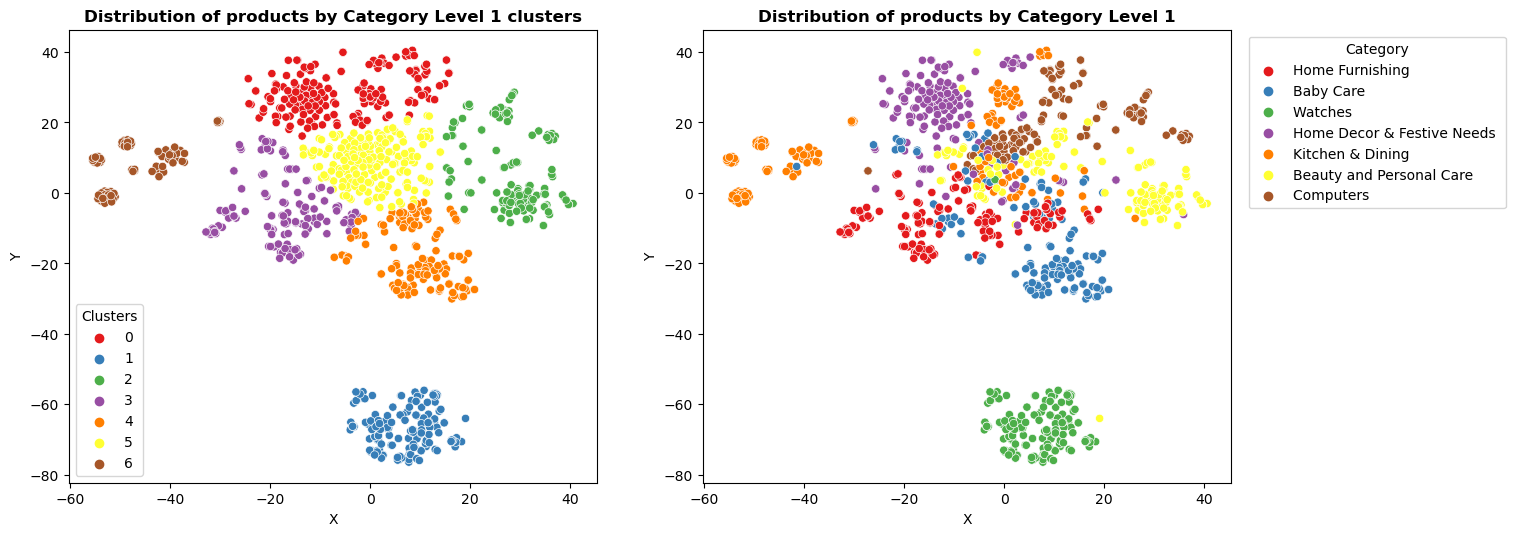

CountVectorizer : 
-----------------
ARI :  0.43
RI :  0.86
(0.43, 0.86)


In [21]:
TSNE_plot(CV_matrix)
print("CountVectorizer : ")
print("-----------------")
print(ARI(CV_matrix))

### 3.3.1.2 TF-IDF (Term Frequency - Inverse Document Frequency)
 - IDF is an inverse count of the number of documents a word appears in. 
 - The tf-idf score measures how significant a word is in the whole corpus and gives small values to frequent words in all the documents and more weight to those more scarce across the corpus.
 
 - idf(t,D)=(Number of documents)/(number of documents that contain term t)

 - tf_idf = term_frequency * inverse_document_frequency 
          = TF * IDF = tf(𝑡,𝑑) * idf(t,D)
          = tf(t,d) * log(D/d)
 
 - where: 
      - t is the word or token
      - d is the document
      - D is the set of documents in the corpus. 

In [22]:
# instantiate the vectorizer
vect = TfidfVectorizer(min_df=0., max_df=1., use_idf=True)
Tfidf_matrix = vect.fit_transform(clean_corpus) 
Tfidf_matrix = Tfidf_matrix.toarray()
vocab_vect = vect.get_feature_names()
Tfidf_matrix_df = pd.DataFrame(Tfidf_matrix, columns = vocab_vect)
Tfidf_matrix_df.shape 

(1050, 4380)

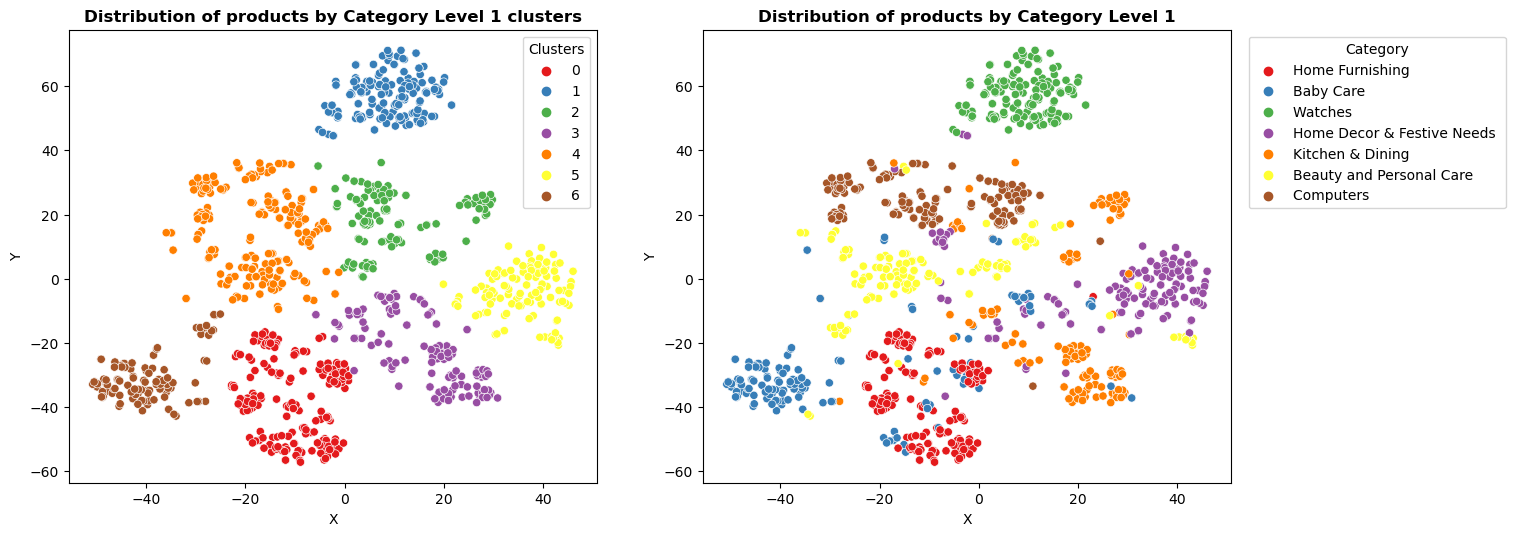

TF-IDF : 
-----------------
ARI :  0.58
RI :  0.9
(0.58, 0.9)


In [23]:
TSNE_plot(Tfidf_matrix)
print("TF-IDF : ")
print("-----------------")
print(ARI(Tfidf_matrix))

***Narratives:***
- The TF-IDF has a better performance with adjusted rand score and rand score of 0.58 and 0.9, respectively, than TF model with values of 0.43 and 0.86, respectively.

### 3.3.2 Word Embeddings

### 3.3.2.1 Word2vec model
 - the numerical representation of texts in a corpus

In [24]:
# create an embedding matrix for words in training docs

def vector_matrix(model, dimension, document):
    '''Convert a corpus of documents into a list of vectors (one vector per document)'''
    feature_vector = np.zeros(dimension, dtype = 'float32')
    document_vector = []
    
    for words in document:
        sum_features = np.zeros(dimension)
        nwords = 0
        for token in words:
            if token in model:
                sum_features += model[token]
                nwords +=1
        if (nwords != 0):
            doc_vect = np.divide(sum_features, nwords)
            document_vector.append(doc_vect)
        else:
            document_vector.append(feature_vector)
    return np.asarray(document_vector)

def build_corpus(document):
    "Creates a list of lists containing words from each sentence"
    
    tokenized_corpus = []
    
    for word in range(len(document)):
        tokenized_corpus.append(tokenizer.tokenize(document[word]))
        #tokenized_corpus.append(word_tokenize(document[word]))
    
    return tokenized_corpus

***Using Google's Word2Vec pre-trained model***

In [25]:
# Tokenized corpus
corpus_w2v = build_corpus(clean_corpus)

# load the google pretrained word embeddings into memory
filename = 'GoogleNews-vectors-negative300.bin'
google_wv = KeyedVectors.load_word2vec_format(filename, binary=True)

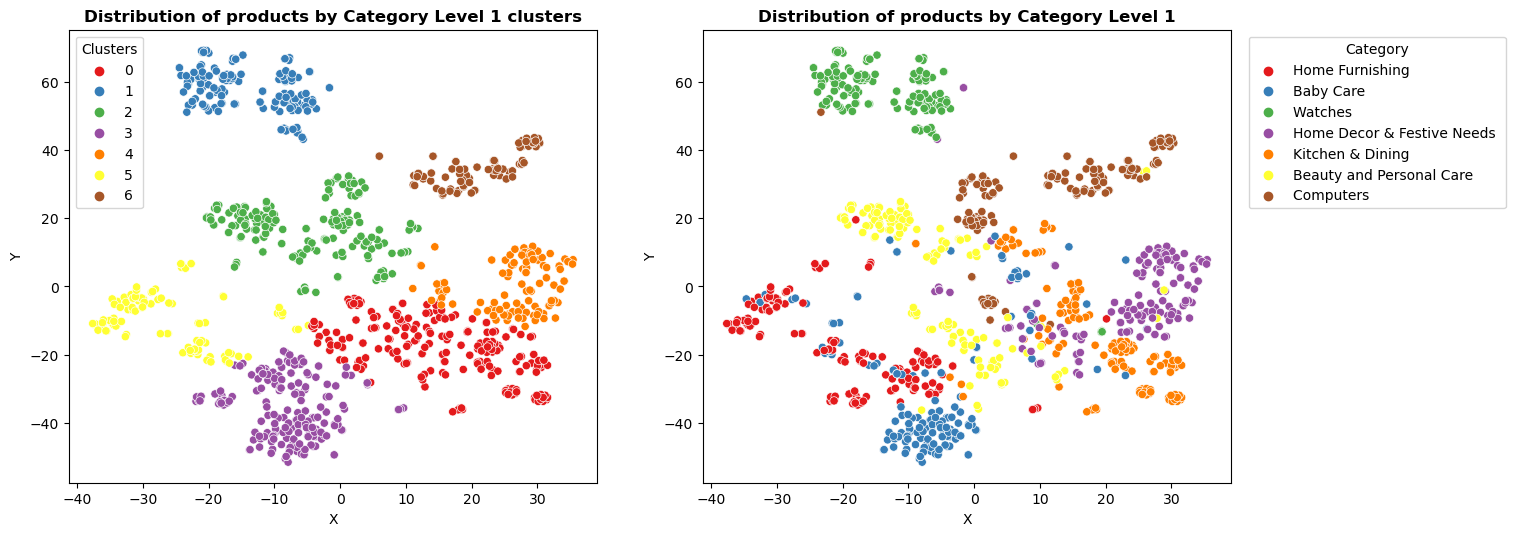

Word2Vec : 
-----------------
ARI :  0.48
RI :  0.87
(0.48, 0.87)


In [26]:
# Embedd the vectors
model = google_wv
dimension = 300
document = corpus_w2v #tokenized corpus

embedding_w2v = vector_matrix(google_wv, dimension=300, document=corpus_w2v)

# Visualize the embedding
TSNE_plot(embedding_w2v)
print("Word2Vec : ")
print("-----------------")
print(ARI(embedding_w2v))

***Using Genism***

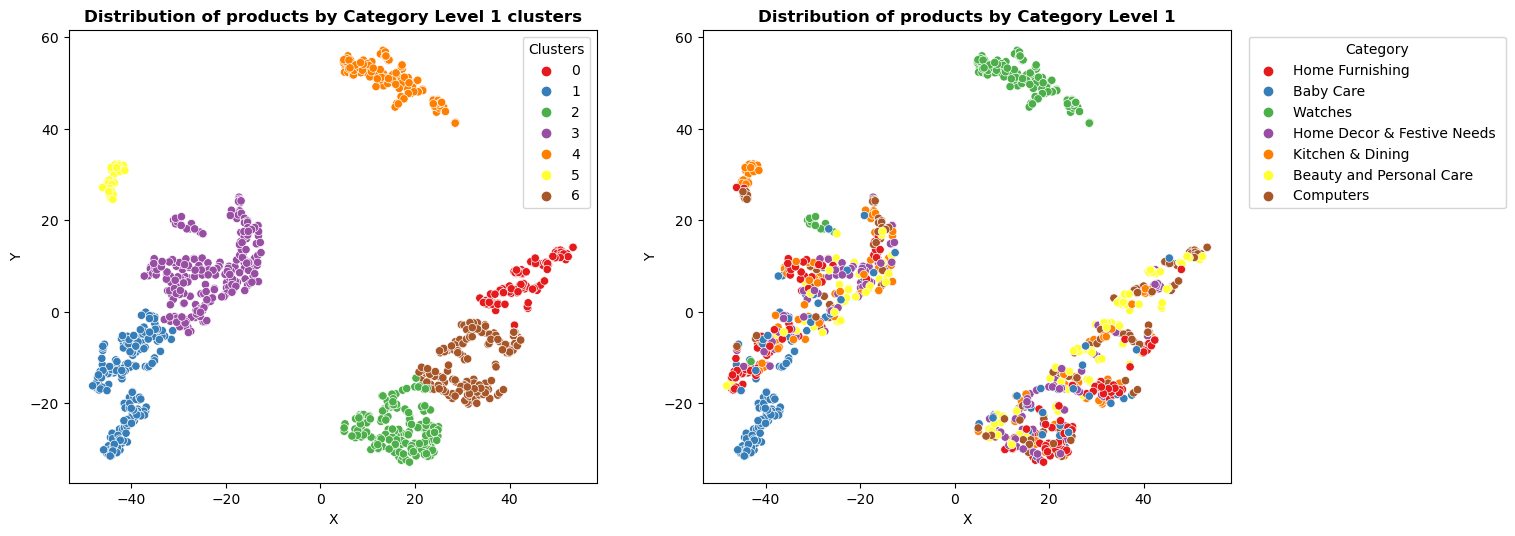

Word2Vec : 
-----------------
ARI :  0.2
RI :  0.79
(0.2, 0.79)


In [27]:
model_corpus = Word2Vec(corpus_w2v, size=300, window=5, workers=1, min_count=3)

model_genism = model_corpus.wv
dimension = 300
document = corpus_w2v #tokenized corpus

embedding_genism = vector_matrix(model_genism, dimension=300, document=corpus_w2v)

# Visualize the embedding
TSNE_plot(embedding_genism)
print("Word2Vec : ")
print("-----------------")
print(ARI(embedding_genism))

***Narrative*** - The Word2Vec model performed better using the pre-trained google model while the genism model poorly perfomed in clustering the products according to their categories

### 3.3.2.2 BERT 
 - stands for Bidirectional Encoder Representations from Transformers
 - a bidirectionally trained contextual model designed to pre-train deep bidirectional representations from unlabeled text by jointly conditioning on both left and right context
 - able to predict missing word by considering the words bidirectionally before and after the missing word as context clues

In [31]:
# Function for preprocessing/cleaning of corpus 
def cleansing_BERTUSE(document):
    '''cleaning function for BERT and USE'''
    # Tokenize the text - split into words
    tokens = tokenizer.tokenize(document)
    # convert all words to lowercase
    lower = [w.lower() for w in tokens]
    # create an empty mapping table list for all of the characters to remove
    table_map = str.maketrans('', '', string.punctuation) 
    # translate each word to remove the punctuation
    strip_punct = [w.translate(table_map) for w in lower]
    # remove non-alphabetic tokens 
    words = [w for w in strip_punct if w.isalpha()]
    # filter out stop words
    stop_words = [w for w in words if w not in set(stopwords.words('english'))]
    # keep only words >2 letters
    st_w = [w for w in stop_words if len(w) > 2] 
    # remove special characters and spaces
    special_car = (re.sub(r"[^a-zA-Z0-9]","", w) for w in st_w ) 
    return ' '.join(special_car) 

In [32]:
# clean each document in the corpus for BERT and USE
clean_BERTUSE = Data['Corpus'].apply(cleansing_BERTUSE)
clean_BERTUSE.head(5)

0    elegance polyester multicolor abstract eyelet ...
1    sathiyas cotton bath towel specifications sath...
2    eurospa cotton terry face towel set key featur...
3    santosh royal fashion cotton printed king size...
4    jaipur print cotton floral king sized double b...
Name: Corpus, dtype: object

***Using Sentence Transformer***

https://maartengr.github.io/BERTopic/getting_started/embeddings/embeddings.html

In [33]:
# Initialize pre-trained bert model
model_bert = SentenceTransformer('all-MiniLM-L6-v2')

# Encode the wordings
bert_vectors = model_bert.encode(clean_BERTUSE.values)

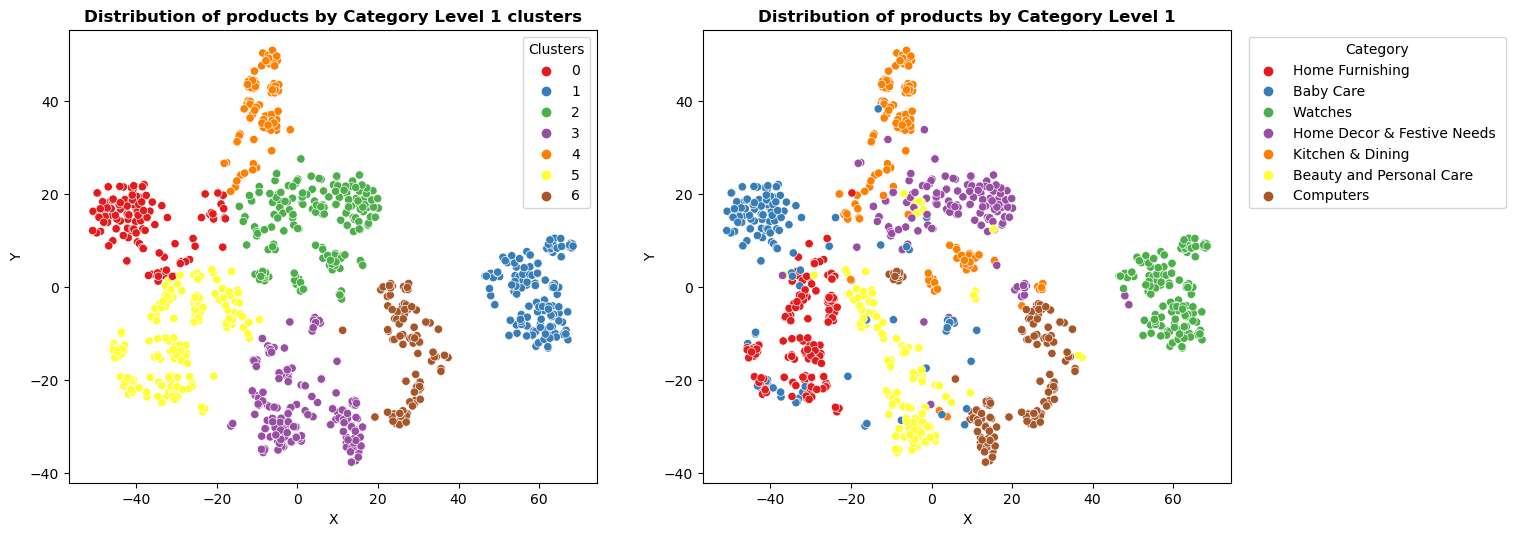

BERT : 
-----------------
ARI :  0.54
RI :  0.89
(0.54, 0.89)


In [34]:
#Visualize the vectors
TSNE_plot(bert_vectors)
print("BERT : ")
print("-----------------")
print(ARI(bert_vectors))

***3.3.2.3 USE*** 
 - Universal Sentence Encoder

In [35]:
# load the google pre-trained hub model

encoder = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [36]:
def USE_feature(text, b_size):
    batch_size = b_size
    time1 = time.time()
    
    # create the embedding model
    for step in range(len(text)//batch_size):
        idx = step*batch_size
        emb = encoder(text[idx:idx+batch_size])

        if step ==0:
            feature = emb
        else :
            feature = np.concatenate((feature,emb))
    time2 = np.round(time.time() - time1,0)
    return feature

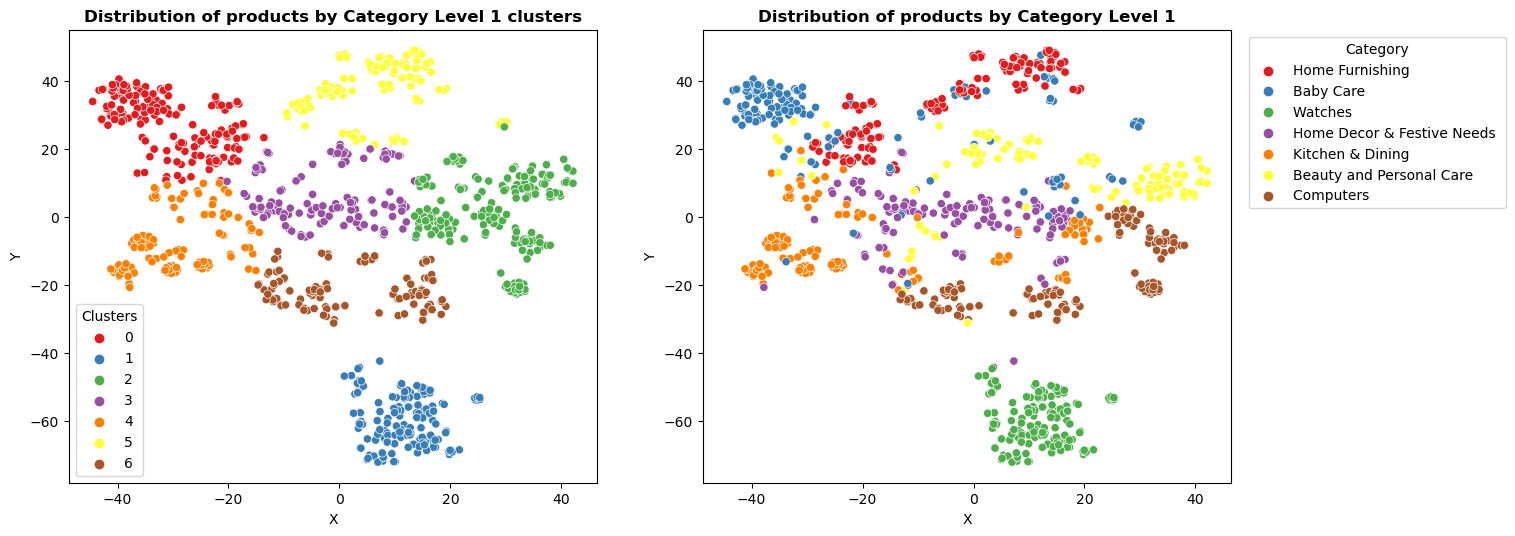

USE : 
-----------------
ARI :  0.44
RI :  0.86
(0.44, 0.86)


In [37]:
# Build the model
Corpus_USE = clean_BERTUSE.tolist()
batch_size = 10
Embedd_USE = USE_feature(Corpus_USE, batch_size)    

#Visualize the model
TSNE_plot(Embedd_USE)
print("USE : ")
print("-----------------")
print(ARI(Embedd_USE))

***Using tensor***

In [38]:
tf_tensor = encoder(clean_BERTUSE.values)
tf_USE = tf.make_ndarray(tf.make_tensor_proto(tf_tensor))
df_use = pd.DataFrame(tf_USE, #index=tf_USE.index,
                         columns=['dim'+str(i) for i in range(512)])

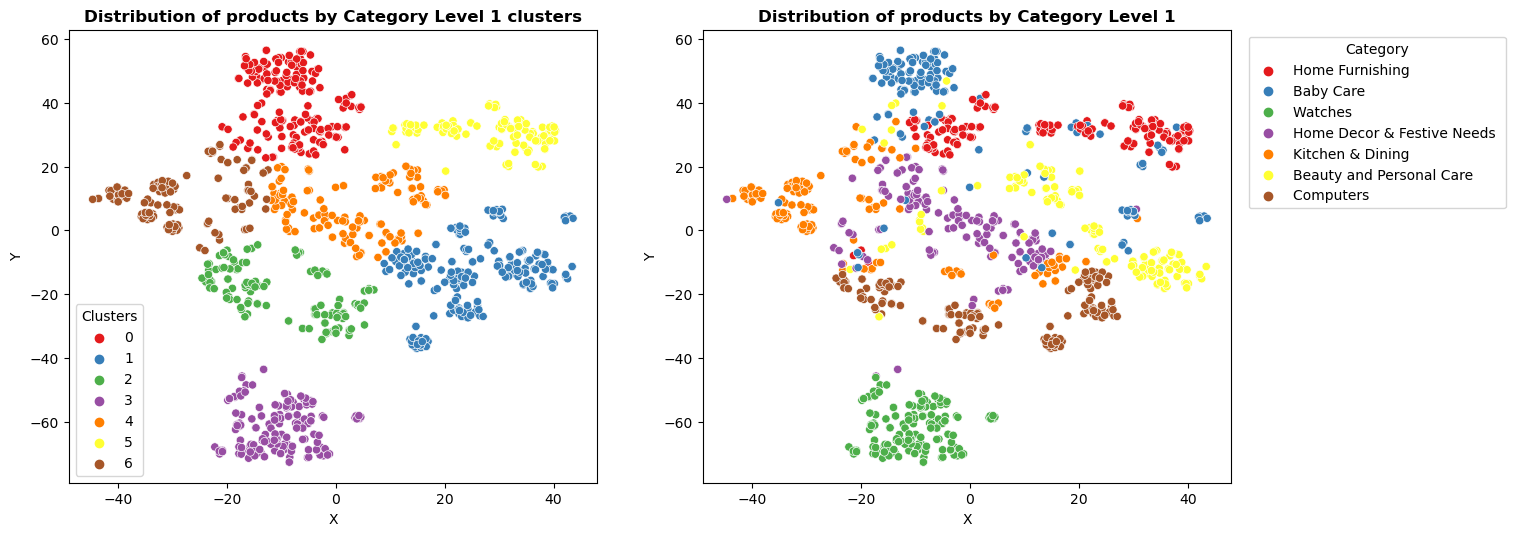

USE : 
-----------------
ARI :  0.45
RI :  0.86
(0.45, 0.86)


In [39]:
#Visualize the model
TSNE_plot(tf_USE)
print("USE : ")
print("-----------------")
print(ARI(tf_USE))

***Narrative*** 
- Overall, the BERT model with an ARI of 0.54 classified the texts better than Word2Vec and USE embedding models in classifying the text datasets

## 4.0 Feature Extraction - Image Dataset

***Extract the image datasets with their category level 1***

In [40]:
# extract the image datasets with their categories
data_image = Data[['image', 'Label']]

#image path
path = "Images"

#image list
photo_list = [file for file in listdir(path)]
print(len(photo_list))

1050


Home Furnishing  150


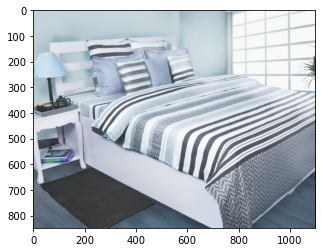

Baby Care  150


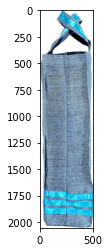

Watches  150


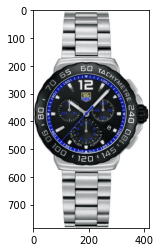

Home Decor & Festive Needs  150


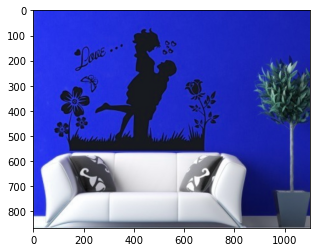

Kitchen & Dining  150


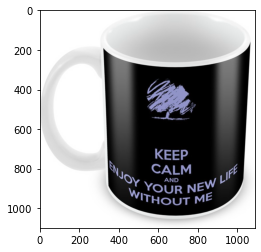

Beauty and Personal Care  150


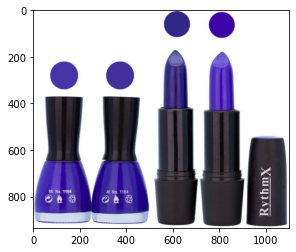

Computers  150


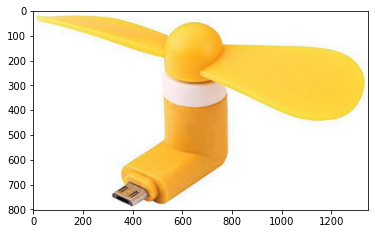

In [41]:
#Display examples of each images in category level 1

for category in data_image['Label'].unique():
    photos = data_image[data_image['Label'] == category]    
    print(category, len(photos))
    
    for i in range(5):
        # Reading Image and storing image object in a variable
        image_i = cv2.imread("Images/" + photos.iloc[i,:]['image'])
        plt.imshow(image_i)
    plt.show()

### 4.1 SIFT
 - Scale Invariant Feature Transform: a feature detection algorithm in Computer Vision capable of identifying key features from images ('keypoints') and matching them to a new image of the same object.

***Image examples***

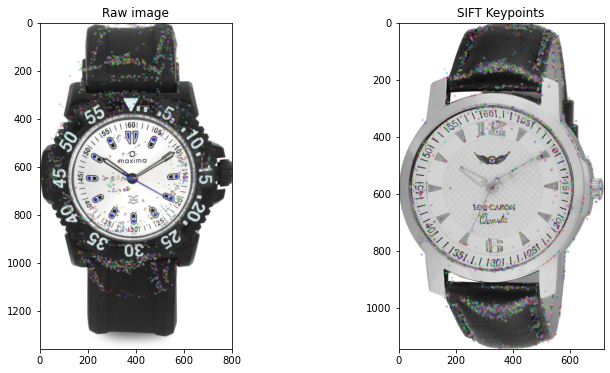

In [42]:
#read images
Raw = cv2.imread("C:/Users/board/Images/1e8741b5ae27a513546c94b3f3312aee.jpg")
Raw_image = cv2.imread("C:/Users/board/Images/1e15dbd9f59a8b2001f91d18ddc84b5a.jpg")

# Extract key features by SIFT
gray_image = cv2.cvtColor(Raw, cv2.COLOR_BGR2GRAY)
sift = cv2.SIFT_create() 
keypoints_1, descriptors_1 = sift.detectAndCompute(gray_image,None)

image_sift = cv2.drawKeypoints(gray_image,keypoints_1,outImage=gray_image)
image_sift_1 = cv2.drawKeypoints(Raw_image,keypoints_1,outImage=Raw_image)
#cv.imwrite('sift_keypoints.jpg',image_sift)

# visualize the raw and SIFT_processed images
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.imshow(image_sift_1)
plt.title('Raw image')

# SIFT_processed
plt.subplot(1, 2, 2)
plt.imshow(image_sift)
plt.title('SIFT Keypoints')
plt.show()

***Feature matching***

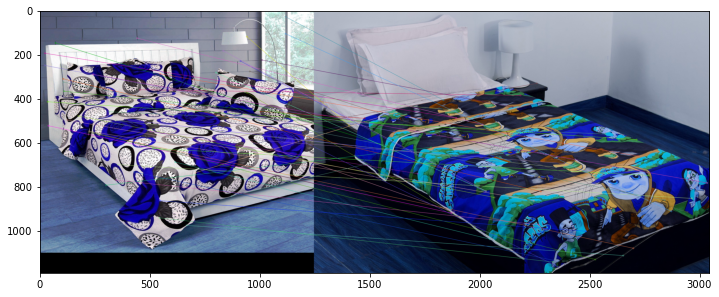

Number of 50 keypoint matches : 827


In [43]:
# read images
image_1 = cv2.imread("C:/Users/board/Images/0906fd9cc604fbba05a502e01d763cd9.jpg", 1)
image_2 = cv2.imread("C:/Users/board/Images/998a39dca0ef610c3a0ea4e9cc6e1681.jpg", 1)

# Calculate key points and feature characters
keypoints_1, descriptors_1 = sift.detectAndCompute(image_1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(image_2,None)

# Feature matching
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

image_3 = cv2.drawMatches(image_1, keypoints_1, image_2, keypoints_2, matches[:50], image_2, flags=2)

# Displaying matches
plt.figure(figsize=(12, 6))
plt.imshow(image_3)
plt.show()
print('Number of 50 keypoint matches :', len(matches))

***Extraction of keypoints from each image***

In [44]:
# extract the image seris and convert them to string
df_image = data_image['image'].apply(lambda x: "Images/" + str(x))

# defining feature extractor 
sift = cv2.SIFT_create()

# create an empty list for the descriptors
Descriptor = []

for i in range(data_image.shape[0]):
    # change to gray format
    image = cv2.imread(df_image.iloc[i], 0)
    
    #reduce size by 50%
    scale = 0.5
    width = int(image.shape[1] * scale)
    height = int(image.shape[0] * scale)
    dimension = (width, height)
    
    #resized image
    image_res = cv2.resize(image, dimension, interpolation = cv2.INTER_AREA)
    image_His = cv2.equalizeHist(image_res)
    del image_res
    
    # computing descriptors vector
    kp, des = sift.detectAndCompute(image_His, None)
    del image_His
    Descriptor.append(des)
    del kp, des

#convert the descriptor of each image to numpy arrays
Descriptor_image = np.asarray(Descriptor)

# Descriptor list for all the images
Descriptors_All = np.concatenate(Descriptor_image, axis = 0)
print('Number of descriptors :', Descriptors_All.shape)

Number of descriptors : (2451020, 128)


***K-means clustering***

In [45]:
# Number of clusters
labels = data_image['Label'].unique()

k = int(round(np.sqrt(len(Descriptors_All)),0))

#I use MiniBatchKMeans to avoid memory error and reduce computational time
kmeans = MiniBatchKMeans(init ='k-means++', n_clusters=k, init_size = 3*k, verbose = 0).fit(Descriptors_All)

***Create histograms***

In [46]:
# create bag of features
def bag_of_features(kmeans, desciptor, nb_img):
    pred = kmeans.predict(desciptor) # get cluster index
    histo = np.zeros(k)
    nb_desc = len(desciptor)
    
    for x in pred:
        histo[x] += 1/nb_desc # normalize histogram
    return histo

# Create histogram matrix
hist_matrix = []

for x, image_ind in enumerate(Descriptor_image):
    histo_A = bag_of_features(kmeans, image_ind, x)
    hist_matrix.append(histo_A)
    
feature_matrix = np.asarray(hist_matrix) 
df_fm = pd.DataFrame(feature_matrix)
feature_matrix.shape

(1050, 1566)

***Visualize the features***

In [47]:
# Functions for TSNE dimension reduction and visualization plots for Transfer learning algorithms

category = data_image['Label']
label = category.nunique()
#cat_l = list(set(category))

# get optimum number of components for dimension reduction
def n_components(X):
    '''returns the optimum number of components that explain at least 99% of the cumulative pca variance'''
    X_df = pd.DataFrame(X)
    pca = PCA()
    pca.fit_transform(X_df)
    
    # get optimal number of PCA components at 99% cumulative variance
    c=0
    for i in pca.explained_variance_ratio_.cumsum()*100:
        c+=1
        if(i>99):
            i = c
            break
    return i

# Function for ARI
def ARI_TL(X):
    '''returns the adjusted_rand_score between actual and predicted clusters by KMeans'''
    
    # create dataframe
    X_df = pd.DataFrame(X)
    
    # Reduce dimension to 2 components with TSNE
    tsne =TSNE(n_components=2, perplexity=30, n_iter=2000, 
                                 init='random', learning_rate=200, random_state=0)
    df_tsne = tsne.fit_transform(X_df)
    
    #cluster with KMeans
    K_means = KMeans(n_clusters=label, n_init=100, random_state=0)
    K_means.fit(df_tsne)
    
    # Calculate ARI
    ARI = np.round(adjusted_rand_score(category, K_means.labels_),2)
    RI = np.round(rand_score(category, K_means.labels_),2)
    
    print("ARI : ", ARI)
    print("RI : ", RI)
    return ARI, RI

#Function for TSNE dimension reduction and visualization in 2D scale
def TSNE_plot_TL(X):
    '''Visualization with TSNE'''
    # create dataframe
    X_df = pd.DataFrame(X)
    tsne =TSNE(n_components=2, perplexity=30, n_iter=2000, 
                                 init='random', learning_rate=200, random_state=0)
    Tsne_df = pd.DataFrame(tsne.fit_transform(X_df), columns = ['X', 'Y'])
    
    #cluster with KMeans
    K_means = KMeans(n_clusters=label, n_init=100, random_state=0)
    K_means.fit(Tsne_df)
    Tsne_df['category'] = category
    Tsne_df['Clusters'] = K_means.labels_
    
    #plot
    fig = plt.figure(figsize=(15,6), dpi = 100)
    ax = fig.add_subplot(121)
    ax= sns.scatterplot(data = Tsne_df, x = 'X', y = 'Y', hue = 'Clusters', palette = 'Set1')
    plt.legend(title="Clusters", frameon=True)
    plt.title('Distribution of products by Category Level 1 clusters', fontweight='bold', size =12)
    
    ax = fig.add_subplot(122)
    ax = sns.scatterplot(data = Tsne_df, x = 'X', y = 'Y', hue = 'category', palette = 'Set1')
    plt.legend(bbox_to_anchor=(1.02, 1), title="Category", frameon=True)
    plt.title('Distribution of products by Category Level 1', fontweight='bold', size =12)
      
    plt.show()

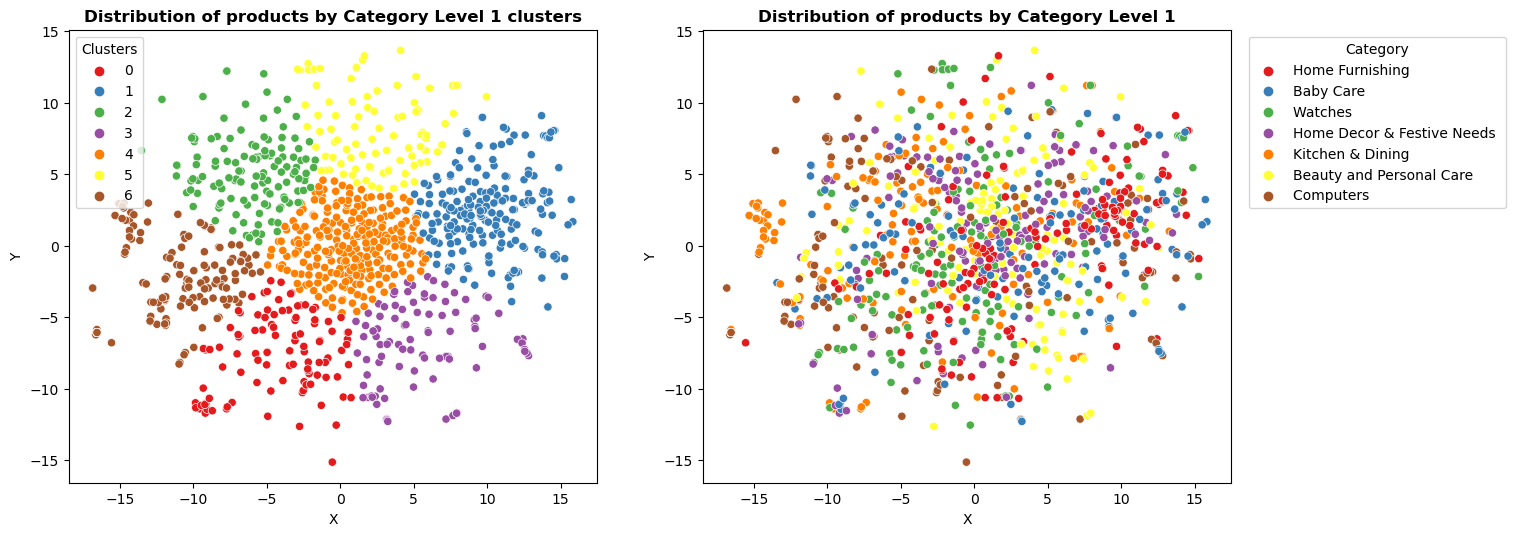

SIFT : 
-----------------
ARI :  0.04
RI :  0.75
(0.04, 0.75)


In [48]:
TSNE_plot_TL(feature_matrix)
print("SIFT : ")
print("-----------------")
print(ARI_TL(feature_matrix))

### 4.2 ORB
- Oriented Fast and Rotated Brief

***Feature extraction***

In [49]:
# Initialize the ORB detector algorithm
orb = cv2.ORB_create()

# extract the image seris and convert them to string
df_image = data_image['image'].apply(lambda x: "Images/" + str(x))

# create an empty list for the descriptors
Descriptor = []

for i in range(data_image.shape[0]):
    # change to gray format
    image = cv2.imread(df_image.iloc[i], 0)
    
    #reduce size by 50%
    scale = 0.5
    width = int(image.shape[1] * scale)
    height = int(image.shape[0] * scale)
    dimension = (width, height)
    
    #resized image
    image_res = cv2.resize(image, dimension, interpolation = cv2.INTER_AREA)
    image_His = cv2.equalizeHist(image_res)
    del image_res
    
    # computing descriptors vector
    kp, des = orb.detectAndCompute(image_His, None)
    del image_His
    Descriptor.append(des)
    del kp, des

#convert the descriptor of each image to numpy arrays
Descriptor_orb = np.asarray(Descriptor)

# Descriptor list for all the images
Descriptors_ORB = np.concatenate(Descriptor_orb, axis = 0)
print('Number of descriptors :', Descriptors_ORB.shape)

Number of descriptors : (489140, 32)


***K-means clustering***

In [50]:
# Number of clusters
labels = data_image['Label'].unique()
#k = len(labels) * 10
k = int(round(np.sqrt(len(Descriptors_ORB)),0))

#I use MiniBatchKMeans to avoid Memory Error and reduce computational time
kmeans = MiniBatchKMeans(init ='k-means++', n_clusters=k, init_size = 3*k, verbose = 0).fit(Descriptors_ORB)

***Create histograms***

In [51]:
# create bag of features
def bag_of_features(kmeans, desciptor, nb_img):
    pred = kmeans.predict(desciptor) # get cluster index
    histo = np.zeros(k)
    nb_desc = len(desciptor)
    
    for x in pred:
        histo[x] += 1/nb_desc # normalize histogram
    return histo

# Create histogram matrix
hist_matrix = []

for x, image_ind in enumerate(Descriptor_orb):
    histo_A = bag_of_features(kmeans, image_ind, x)
    hist_matrix.append(histo_A)
    
feature_ORB = np.asarray(hist_matrix) 
df_ORB = pd.DataFrame(feature_ORB)
df_ORB.shape

(1050, 699)

***Visualize the features***

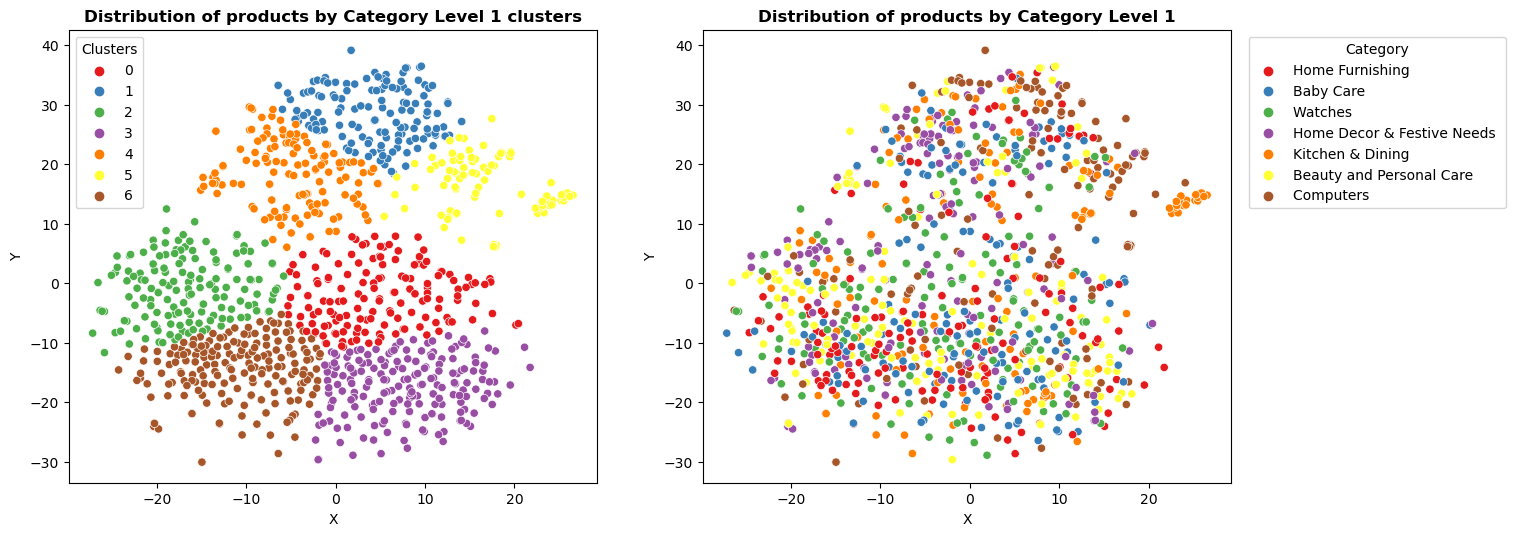

ORB : 
-----------------
ARI :  0.03
RI :  0.76
(0.03, 0.76)


In [52]:
#Visualize the features
TSNE_plot_TL(feature_ORB)
print("ORB : ")
print("-----------------")
print(ARI_TL(feature_ORB))

***Narrative*** -  The two bag of visual word models are unable to classify the products according to their images 

### 4.3 Transfer Learning Models
- convolutional neural network models

### 4.3.1 VGG16

In [53]:
# load the model 
model = VGG16()

# remove the output layer
model = Model(inputs = model.inputs, outputs = model.layers[-2].output)

In [54]:
# loop through each image in the dataset to extract the features
feature_vectors = []

for image_i in range(df_image.shape[0]):
    # load the image as a 224x224 array
    image = load_img(df_image.iloc[image_i], target_size=(224, 224))
    
    # convert the image pixels to a numpy array
    image = img_to_array(image)
    
    # reshape the data for the model reshape(num_of_samples, dim 1, dim 2, channels)
    image_reshaped = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    
    # prepare the image for the VGG model
    image_model = preprocess_input(image_reshaped)
    
    # get the extracted feature vectors
    feature_model = model.predict(image_model, use_multiprocessing=True, verbose = 0)
    feature_vectors.append(feature_model[0]) 
    
    # create dataframe
    feature_vect_df = pd.DataFrame(feature_vectors)

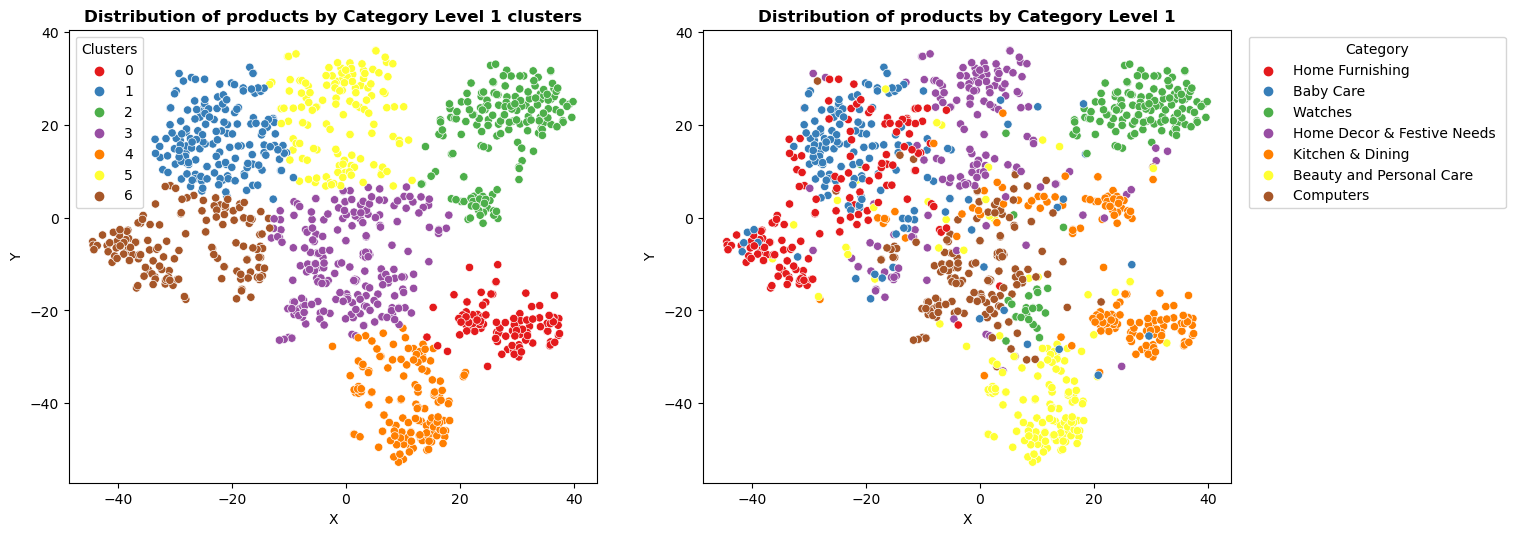

VGG16 : 
-----------------
ARI :  0.44
RI :  0.86
(0.44, 0.86)


In [55]:
#Visualize the features
TSNE_plot_TL(feature_vectors)
print("VGG16 : ")
print("-----------------")
print(ARI_TL(feature_vectors))

### 4.3.2 Xception

In [56]:
#Instantiate the Xception model on a MobileNet V2 model pre-loaded with weights trained on ImageNet
model = Xception(include_top=False, weights="imagenet", input_shape=None)

In [57]:
# loop through each image in the dataset to extract the features
feature_X = []

for image_i in range(df_image.shape[0]):
    # load the image as a 224x224 array
    image = load_img(df_image.iloc[image_i], target_size=(224, 224))
    
    # convert the image pixels to a numpy array
    image = img_to_array(image)
    
    # reshape the data for the model reshape(num_of_samples, dim 1, dim 2, channels)
    image_Transformed = np.expand_dims(image, axis=0)
    
    # Preprocess input
    #Preprocess_image = preprocess_input(image_Transformed)
    Preprocess_image = tf.keras.applications.xception.preprocess_input(image_Transformed)
    
    # get the extracted feature vectors
    feature_pred = model.predict(Preprocess_image, verbose = 0)
    
    # Use global average pooling to convert the features to a single 2048 vector per image
    GAL = tf.keras.layers.GlobalAveragePooling2D()
    feature_np_average = GAL(feature_pred)
    
    feature_X.append(feature_np_average[0])

    feature_np = np.asarray(feature_X)
    
feature_np.shape

(1050, 2048)

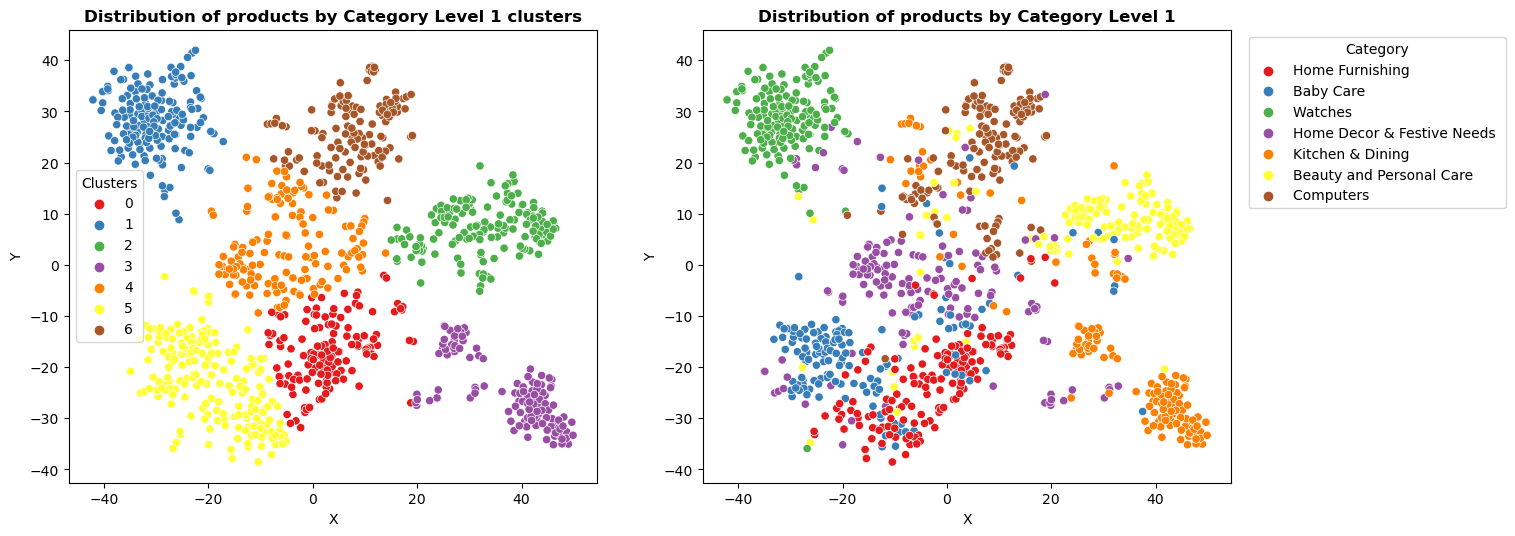

Xception : 
-----------------
ARI :  0.51
RI :  0.88
(0.51, 0.88)


In [58]:
#Visualize the features
TSNE_plot_TL(feature_np)
print("Xception : ")
print("-----------------")
print(ARI_TL(feature_np))

***Narrative*** - Although the two transfer learning models tested in this modeling moderately classified the products based on the extracted image features, Xception perfomed better than the VGG16 model due to higher ARI

### 4.4 Comparison of the model performances

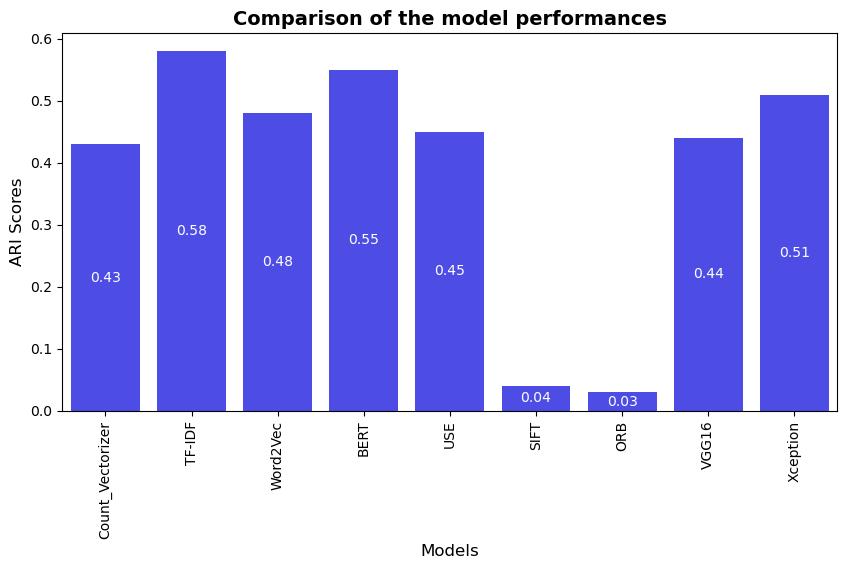

In [87]:
models = ['Count_Vectorizer', 'TF-IDF', 'Word2Vec', 'BERT', 'USE', 'SIFT', 'ORB', 'VGG16', 'Xception']
ARI = ['0.43', '0.58', '0.48', '0.55', '0.45', '0.04', '0.03', '0.44', '0.51']
df_Evaluation = pd.DataFrame({'Model': models, 'ARI Scores':  ARI})

df_Evaluation['Model'] = df_Evaluation['Model'].astype(str)
df_Evaluation['ARI Scores'] = df_Evaluation['ARI Scores'].astype(float)
plt.figure(figsize=(10,5), dpi = 100)
ax1 = sns.barplot(data=df_Evaluation, x= 'Model', y = 'ARI Scores', color = 'blue', alpha = 0.8)
ax1.bar_label(ax1.containers[0], label_type='center', color='white')
plt.title('Comparison of the model performances', size=14, fontweight='bold')
plt.xticks(rotation=90)
plt.xlabel('Models', size=12)
plt.ylabel('ARI Scores', size=12)
plt.show()

### 5.0 Conclusion
 - The preferred classification models for the text and image dataset for automatic classification of consumer products for Market Place are BERT and Xception models, respecitively.